## Healthy Options as of 2024

Bodegas & Grocery Stores Receiving Recognition from Borough President's Office

Target areas:

• South Bronx

• North and Central Brooklyn

• East and Central Harlem (Upper Manhattan)

The Borough President's Office awards the stores which follow and maintain the rules below for one month atleast. These are "Healthy Stores"

(1) availability of healthier foods, such as low-sodium canned goods, healthier snacks and deli options

(2) promotion of healthier foods by posting Shop Healthy marketing materials for healthier foods and removing unhealthy advertising from the front door

(3) visibility of healthier foods by placing them in more prominent locations, such as placing produce at the checkout counter or near the front entrance of the store, and water and other low-calorie drinks at eye-level

In [87]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data into a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Vakiti/Miigating-Nutritional-Disparities-In-New-York/data/Recognized_Shop_Healthy_Stores_20240417.csv")

df

,Store Name,Street Address,Address,Borough,Zip \nCode,Year Awarded,Program \nWave,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,Rivas Deli Grocery,651 East 183rd Street,NaN,Bronx,10458,2013,1,40.852568,-73.887484,206.0,15.0,2012464.0,2.030870e+09,391.0,BX0603
1,C-Town,1761 Southern Boulevard,NaN,Bronx,10460,2013,1,40.837267,-73.888016,203.0,15.0,2009878.0,2.029400e+09,155.0,BX0303
2,La India Mini Market,1942 Marmion Avenue,NaN,Bronx,10460,2013,1,40.842942,-73.887136,206.0,15.0,2010156.0,2.029600e+09,36502.0,BX0602
3,Los Hermanos,2019 Vyse Avenue,NaN,Bronx,10460,2013,1,40.842391,-73.881835,206.0,15.0,2013203.0,2.031270e+09,363.0,BX0601
4,Price Choice Food Market,820 East 180th Street,NaN,Bronx,10460,2013,1,40.846173,-73.884871,206.0,15.0,2012955.0,2.031080e+09,36501.0,BX0602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,Piggy Meat Corp,301 Marcus Garvey BLVD,NaN,Brooklyn,11221,2023,10,40.687193,-73.938868,303.0,36.0,3325019.0,3.016340e+09,277.0,BK0302
671,Natural And Organic Deli Corp,1203 Myrtle Avenue,NaN,Brooklyn,11221,2023,10,40.697358,-73.931971,304.0,34.0,3072462.0,3.031830e+09,391.0,BK0401
672,Keita West African Market Inc,1225 Broadway,NaN,Brooklyn,11221,2023,10,40.691837,-73.926142,304.0,37.0,3074943.0,3.032830e+09,395.0,BK0402
673,Organic Fresh Market Corps,1440 Broadway,NaN,Brooklyn,11221,2023,10,40.688051,-73.919544,303.0,41.0,3039726.0,3.014840e+09,375.0,BK0302


Columns in this Dataset:

1. **Store Name:** Name of grocery store or supermarket that was awarded the proclamation

2. **Street Address:** Address of store that was awarded the proclamation

3. **Address:** The address of the store receiving the proclamation.

4. **Borough:** The NYC borough in which the store receiving the proclamation is located.

5. **Zip Code:** The 5-Digit zip code in which the store receiving the proclamation is located.

6. **Year Awarded:** The specific year in which the store received a proclamation award.

7. **Program Wave:** The specific year of the program in which the store was a participant.

8. **Latitude:** Latitude of the store's location.

9. **Longitude:** Longitude of the store's location.

10. **Community Board:** The Community Board field indicates the New York City Community District where the store is located.

11. **Council District:** The Council District field indicates the New York City Council District where the store is located.

12. **BIN:** The BIN (store Identification Number) is a unique identifier for each store in the City.

13. **BBL:** The BBL (Borough, Block, and Lot) is a unique identifier for each tax lot in the City.

14. **Census Tract (2020):** The Census Tract (Census 2020) field indicates the U.S. Census Tract where the building is located. Please note that as part of the geocoding process, leading and trailing zeros are dropped

15. **Neighborhood Tabulation Area (NTA) (2020):** The Neighborhood Tabulation Area (Census 2020) field indicates the New York City Neighborhood area where the building is located

In [88]:
df.isna().sum()

Store Name                                     0
Street Address                                 0
Address                                      675
Borough                                        0
Zip \nCode                                     0
Year Awarded                                   0
Program \nWave                                 0
Latitude                                      40
Longitude                                     40
Community Board                               40
Council District                              40
BIN                                           49
BBL                                           49
Census Tract (2020)                           40
Neighborhood Tabulation Area (NTA) (2020)     40
dtype: int64

My Neighborhood Tabulation Area (NTA) (2020) column has 40 missing values. I have another dataset called 2020 Neighborhood Tabulation Areas (NTAs) - Tabular. It has columns: 
the_geom	
BoroCode	
BoroName	
CountyFIPS	
NTA2020	
NTAName	
NTAAbbrev	
NTAType	
CDTA2020	
CDTAName	
Shape_Leng	
Shape_Area																																						

These can be matched with the NTA dataset and the missing values column NTA of recognized healthy outlet dataset can be replaced. The steps would be: 

- make a subset of recognized healthy outlet datasets with it's datapoints being the ones having missing values in "Neighborhood Tabulation Area (NTA) (2020)"   column. name this dataset missing_nta_df


- match "Address" column of  missing_nta_df with "NTAName" column of NTA dataset. If any word in both the columns match, then replace the "Neighborhood Tabulation Area (NTA) (2020)"  value with "NTA2020" column of NTA Dataset


- finally replace the finished missing_nta_df into the big df1 i.e,  recognized healthy outlet dataset

In [89]:
nta_df=pd.read_csv("https://raw.githubusercontent.com/Vakiti/Miigating-Nutritional-Disparities-In-New-York/data/2020_NTA_Transformed.csv")


#nta_df.isna().sum()

nta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BoroCode    234 non-null    int64  
 1   BoroName    234 non-null    object 
 2   CountyFIPS  234 non-null    int64  
 3   NTA2020     234 non-null    object 
 4   NTAName     234 non-null    object 
 5   NTAAbbrev   234 non-null    object 
 6   NTAType     234 non-null    int64  
 7   CDTA2020    234 non-null    object 
 8   CDTAName    234 non-null    object 
 9   Shape_Leng  234 non-null    float64
 10  Shape_Area  234 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 20.2+ KB


In [90]:
# Step 1: Create a subset of recognized healthy outlet dataset with missing NTA values
missing_nta_df = df[df["Neighborhood Tabulation Area (NTA) (2020)"].isnull()]

#missing_nta_df

In [91]:
# Define a function to determine the borough based on the zipcode
def get_borough(zipcode):
    # Define zip code ranges for each borough
    zip_ranges = {
        "Bronx": [(10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 
                   10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475)],
        "Brooklyn": [(11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 
                      11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 
                      11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11241, 11243, 11249)],
        "Manhattan": [(10001, 10002, 10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,
                       10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,
                       10034,10035,10036,10037,10038,10039,10040,10044,10069,10103,10119,10128,10162,10165,10170,10173,
                       10199,10279,10280,10282)],
        "Queens": [(11004, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11351, 11354, 11355, 11356, 11357, 11358, 
                    11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11370, 11372, 11373, 
                    11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 
                    11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428, 11429, 11432, 11433, 11434, 11435, 11436, 
                    11691, 11692, 11693, 11694, 11697)],
        "Staten Island": [(10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10313, 
                           10314)]
    }
    
    # Iterate over boroughs and check if the zipcode falls within any range
    for borough, ranges in zip_ranges.items():
        for zipcode_range in ranges:
            if zipcode in zipcode_range:
                return borough
    return "Unknown"  # Return "Unknown" if the zipcode doesn't match any borough

# Apply the function to create a new column "Borough" based on the "Zipcode" column
df['Borough'] = df['Zip \nCode'].apply(get_borough)


In [92]:
df['Borough'].value_counts()

Bronx        291
Brooklyn     245
Manhattan    139
Name: Borough, dtype: int64

In [93]:
import re

# Loop through each row in the missing_nta_df DataFrame
for index, row in missing_nta_df.iterrows():
    # Get the street address from the current row
    address = row["Street Address"]
    
    # Iterate through each row in the nta_df DataFrame
    for _, nta_row in nta_df.iterrows():
        nta_name = nta_row["NTAName"]
        # Check if any word in the address is a substring of the NTA name
        if any(word.lower() in nta_name.lower() for word in re.split(r'\W+', address)):
            # If a match is found, replace the NTA value in missing_nta_df with the corresponding value from nta_df
            missing_nta_df.at[index, "Neighborhood Tabulation Area (NTA) (2020)"] = nta_row["NTA2020"]
            break


In [94]:
df['Council District'].value_counts()

15.0    81
16.0    77
8.0     70
37.0    70
9.0     66
41.0    63
14.0    60
17.0    42
36.0    38
34.0    38
42.0    22
7.0      4
33.0     4
Name: Council District, dtype: int64

In [95]:
# Specify the indices of the rows to be replaced
indices_to_replace = [11, 12, 459, 631, 674]

# Iterate over the indices and replace the rows in df1 with corresponding rows from missing_nta_df
for index in indices_to_replace:
    df.loc[index] = missing_nta_df.loc[index]
    
#missing_nta_df = df[df["Neighborhood Tabulation Area (NTA) (2020)"].isnull()]
#len(missing_nta_df)=35


In [96]:
df1=df.copy()

df1=df1.drop('Address', axis=1)

### How many stores received recognition from the Borough President's Office each year, and what is the trend over time? How has the number of recognized stores changed over the years (Year Awarded)?¶


Spatial Distribution by Borough:

- How many recognized stores are there in each borough?

- Which borough has the highest and lowest number of recognized stores?

- What is the percentage distribution of recognized stores across different boroughs?

Temporal Trends:

- How has the number of recognized stores changed over the years (Year Awarded)?

- Are there any noticeable trends or patterns in the distribution of store awards over time?

In [97]:
#df1["Borough"].value_counts()

In [98]:
# Group the data by "Year Awarded" and count the number of stores in each year
stores_by_year = df1.groupby("Year Awarded").size().reset_index(name="Number of Stores")

# Define colors for bars
colors = np.where(stores_by_year["Year Awarded"] == stores_by_year["Year Awarded"].max(), 'brown', 'grey')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


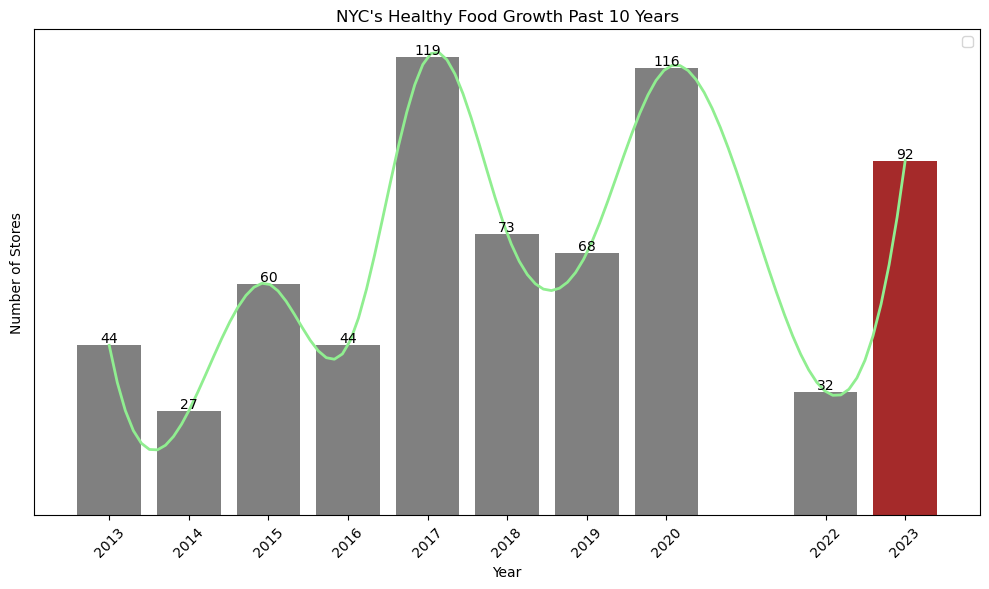

In [99]:
from scipy.interpolate import interp1d

# Interpolate the data for smoother line
f = interp1d(stores_by_year["Year Awarded"], stores_by_year["Number of Stores"], kind='cubic')
x_new = np.linspace(stores_by_year["Year Awarded"].min(), stores_by_year["Year Awarded"].max(), 100)
y_smooth = f(x_new)

# Plot the trend in the number of recognized stores over time
plt.figure(figsize=(10, 6))

# Bar plot
bars = plt.bar(stores_by_year["Year Awarded"], stores_by_year["Number of Stores"], color=colors)

# Line plot
plt.plot(x_new, y_smooth, color='lightgreen', linestyle='-',lw='2', marker='')

# Add text annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

plt.title("NYC's Healthy Food Growth Past 10 Years")
plt.xlabel("Year")
plt.ylabel("Number of Stores")
plt.xticks(stores_by_year["Year Awarded"], rotation=45)
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()


Overall, the trend indicates some level of variability in the number of recognized stores each year, with no consistent pattern of increase or decrease observed over the years. Upon looking closely, we can see that though there were fluctuations, the number increased till 2017 and then took a dip for the next 2 years. 2018 and 2019 had almost equal scarcity of healthy options. The line soared in 2020, almost reaching to the all-time high of 2017 and then plummetted in 2022 with only 32 places being considered "healthy stores" by the borough councils. 2023 had a relatively high nuber of 92. The missing data for 2021 makes it challenging to assess the continuity of the trend during that year. 

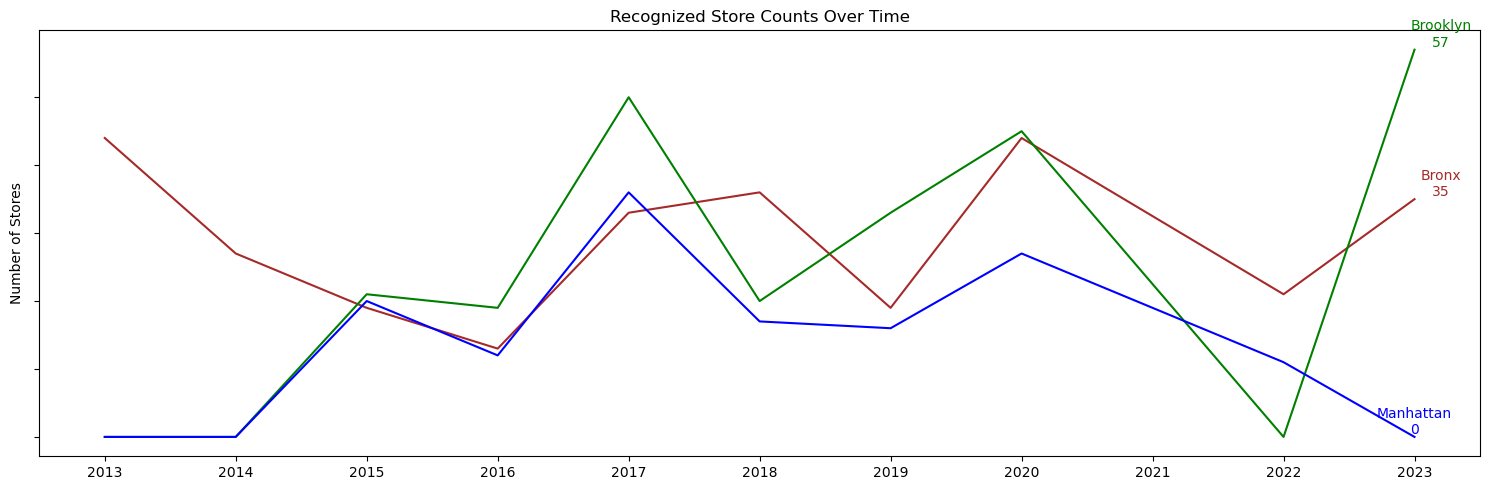

In [100]:
# Group the data by borough and year awarded
borough_year_groups = df.groupby(["Borough", "Year Awarded"]).size().unstack(fill_value=0)

# Plot the count of recognized stores over time for each borough
plt.figure(figsize=(15, 5))

for borough in borough_year_groups.index:
    color = 'brown' if borough == 'Bronx' else 'blue' if borough == 'Manhattan' else 'green'
    plt.plot(borough_year_groups.columns, borough_year_groups.loc[borough], label=borough, color=color)
    # Annotate the first or last point of each line with the number of stores and the borough name
    if borough == 'Bronx':
        x_coord = borough_year_groups.columns[-1] + 0.2  # Adjust the x-coordinate for Bronx
    elif borough == 'Manhattan':
        x_coord = borough_year_groups.columns[-1]  # Adjust the x-coordinate for Manhattan
    else:
        x_coord = borough_year_groups.columns[-1] + 0.2  # Adjust the x-coordinate for Brooklyn
    plt.text(x_coord, borough_year_groups.loc[borough, borough_year_groups.columns[-1]], 
             f"{borough}\n{borough_year_groups.loc[borough, borough_year_groups.columns[-1]]}", 
             ha='center', va='bottom', color=color)

plt.title("Recognized Store Counts Over Time")
#plt.xlabel("Year")
plt.ylabel("Number of Stores")
plt.xticks(np.arange(df["Year Awarded"].min(), df["Year Awarded"].max()+1, 1))
plt.gca().yaxis.set_ticklabels([])
plt.tight_layout()
plt.show()


### What is the distribution of recognized stores across different boroughs of New York City?

In [101]:
import matplotlib.pyplot as plt

# Grouping the data by Borough and counting the number of recognized stores in each borough
borough_counts = df1.groupby("Borough")["Store Name"].count().reset_index()

# Sorting the borough counts in descending order
borough_counts = borough_counts.sort_values(by="Store Name", ascending=False)


In [102]:
'''# Plotting the distribution of recognized stores across boroughs using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_counts["Store Name"], labels=borough_counts["Borough"], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title("Distribution of Recognized Stores Across Different Boroughs")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()
'''

'# Plotting the distribution of recognized stores across boroughs using a pie chart\nplt.figure(figsize=(8, 8))\nplt.pie(borough_counts["Store Name"], labels=borough_counts["Borough"], autopct=\'%1.1f%%\', startangle=140, colors=[\'lightblue\', \'lightgreen\', \'lightcoral\', \'lightskyblue\', \'lightpink\'])\nplt.title("Distribution of Recognized Stores Across Different Boroughs")\nplt.axis(\'equal\')  # Equal aspect ratio ensures that pie is drawn as a circle\nplt.tight_layout()\nplt.show()\n'

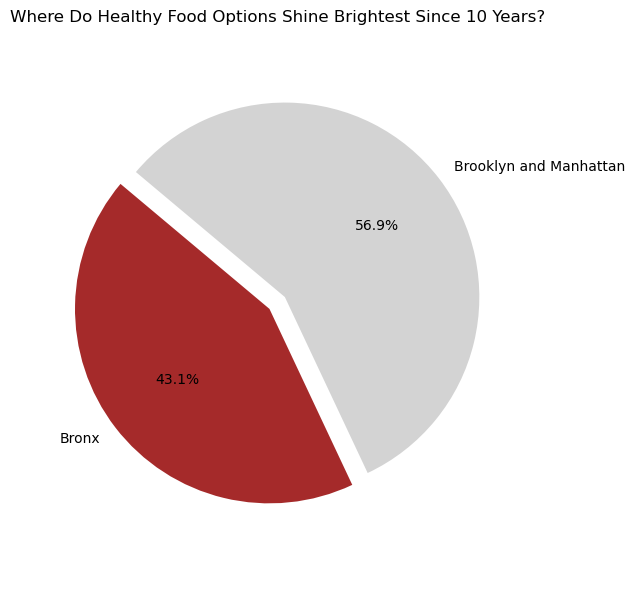

In [103]:
import matplotlib.pyplot as plt

# Extracting data for Brooklyn and the rest of NYC
bronx_count = borough_counts.loc[borough_counts['Borough'] == 'Bronx', 'Store Name'].iloc[0]
nyc_total_count = borough_counts['Store Name'].sum()
rest_of_nyc_count = nyc_total_count - bronx_count

# Labels for the pie chart
labels = ['Bronx', 'Brooklyn and Manhattan']
sizes = [bronx_count, rest_of_nyc_count]
colors = ['brown', 'lightgrey']
explode = (0.1, 0)  # Explode the Brooklyn slice slightly

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Where Do Healthy Food Options Shine Brightest Since 10 Years?")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


### Are there any patterns or trends in the types of neighborhoods or community board areas where recognized stores are located?

In [104]:
import pandas as pd

# Group the data by Neighborhood Tabulation Area (NTA) or Community Board and count the number of recognized stores in each area
neighborhood_counts = df1.groupby('Neighborhood Tabulation Area (NTA) (2020)').size().reset_index(name='Store Count')
community_board_counts = df1.groupby('Community Board').size().reset_index(name='Store Count')

# Sort the counts in descending order to identify the areas with the highest number of recognized stores
neighborhood_counts = neighborhood_counts.sort_values(by='Store Count', ascending=False)
community_board_counts = community_board_counts.sort_values(by='Store Count', ascending=False)

# Print the top 10 areas with the highest number of recognized stores
print("Top 10 Neighborhoods with the Highest Number of Recognized Stores:")
print(neighborhood_counts.head(10))
print("\nTop 10 Community Boards with the Highest Number of Recognized Stores:")
print(community_board_counts.head(10))


Top 10 Neighborhoods with the Highest Number of Recognized Stores:
   Neighborhood Tabulation Area (NTA) (2020)  Store Count
40                                    MN1102           47
38                                    MN1002           43
3                                     BK0302           40
27                                    BX0502           38
4                                     BK0401           34
13                                    BK1602           34
39                                    MN1101           33
25                                    BX0403           29
23                                    BX0401           28
26                                    BX0501           28

Top 10 Community Boards with the Highest Number of Recognized Stores:
    Community Board  Store Count
7             205.0           84
2             111.0           80
6             204.0           66
12            304.0           59
11            303.0           53
15            316.0       

In [105]:
# Group the data by Census Tract and count the number of recognized stores in each tract
tract_counts = df.groupby('Census Tract (2020)').size().reset_index(name='Store Count')

# Sort the counts in descending order to identify the tracts with the highest number of recognized stores
tract_counts = tract_counts.sort_values(by='Store Count', ascending=False)

# Print the top 10 tracts with the highest number of recognized stores
print("Top 10 Census Tracts with the Highest Number of Recognized Stores:")
print(tract_counts.head(10))

Top 10 Census Tracts with the Highest Number of Recognized Stores:
     Census Tract (2020)  Store Count
24                 166.0           13
36                 188.0           12
64                 239.0           10
32                 180.0            9
98                 385.0            9
60                 228.0            9
65                 241.0            8
194              22102.0            8
178              17702.0            8
202              23502.0            7


In [106]:
# Group the data by Census Tract and count the number of recognized stores in each tract
tract_counts = df.groupby('Census Tract (2020)').size().reset_index(name='Store Count')

# Sort the counts in descending order to identify the tracts with the highest number of recognized stores
tract_counts = tract_counts.sort_values(by='Store Count', ascending=True)

# Print the top 10 tracts with the highest number of recognized stores
print("Top 10 Census Tracts with the Highest Number of Recognized Stores:")
print(tract_counts.head(10))

Top 10 Census Tracts with the Highest Number of Recognized Stores:
     Census Tract (2020)  Store Count
226             120801.0            1
147                920.0            1
149               1104.0            1
151               1122.0            1
152               1124.0            1
62                 231.0            1
153               1130.0            1
156               1160.0            1
141                902.0            1
58                 225.0            1


**Neighborhoods with the Highest Number of Recognized Stores:** 

- MN1102 (Neighborhood Tabulation Area in Manhattan) has the highest number of recognized stores with 47 stores, followed by MN1002 (also in Manhattan) with 43 stores.

- Several neighborhoods in Brooklyn (BK0302, BK1602, BK0401) and the Bronx (BX0502, BX0403, BX0401, BX0501) are also among the top 10 neighborhoods with a high number of recognized stores.


**Community Boards with the Highest Number of Recognized Stores:** 

- Community Board 205.0 has the highest number of recognized stores with 84 stores, followed by Community Board 111.0 with 80 stores. These high counts indicate areas with potentially better access to healthy food options and active efforts towards promoting healthier eating habits.


**Census Tracts with the Lowest Number of Recognized Stores:**

- Several census tracts have only one recognized store, indicating potential areas with limited access to healthy food options. These areas might require more attention and intervention to address nutritional disparities and improve access to healthier food choices.

**Census Tracts with the Highest Number of Recognized Stores:** 

- Some census tracts have a relatively high number of recognized stores, indicating areas where efforts to promote healthier food options have been successful. Understanding the factors contributing to the success of these areas can provide valuable insights for implementing similar initiatives in other regions.

## Relationship to outer factors

### Zipcode, Pop_Density and County merging with current dataset

In [107]:
zip_df=pd.read_csv("https://raw.githubusercontent.com/Vakiti/Miigating-Nutritional-Disparities-In-New-York/data/Pop_Density_wrt_Zip_New_York.csv")

In [108]:
#zip_df

In [109]:
# Rename the column 'Zip \nCode' to 'Zip' in df1 and Population Density(sq mi)▼ to pop_den
df1 = df1.rename(columns={'Zip \nCode': 'Zip'})

zip_df=zip_df.rename(columns={'Population Density(sq mi)▼': 'pop_den'})
zip_df=zip_df.rename(columns={'Zip ': 'Zip'})

In [110]:
# Convert the 'Zip ' column in zip_df to int64
zip_df['Zip'] = zip_df['Zip'].astype('int64')

In [111]:
# Perform inner merge between df1 and zip_df based on Zipcode column
merged_df = pd.merge(df1, zip_df, on='Zip', how='inner')

# Add Pop Density column from zip_df to df1
merged_df['pop_den'] = merged_df['pop_den']

In [112]:
county_df=pd.read_csv("https://raw.githubusercontent.com/Vakiti/Miigating-Nutritional-Disparities-In-New-York/data/New_York_Zip_County.csv")

In [113]:
# Rename the column 'County Name' to 'county' in df1 and Population Density(sq mi)▼ to pop_den
county_df = county_df.rename(columns={'County Name': 'county'})

In [114]:
merged_df1= pd.merge(merged_df, county_df, on='Zip', how='inner')

# Add county column from zip_df to df1
merged_df1['county'] = merged_df1['county']

In [131]:
#merged_df1

In [116]:
merged_df1['county'].value_counts()

Bronx       291
Kings       245
New York    139
Name: county, dtype: int64

In [117]:
# Group merged_df1 by 'Borough' and count the number of unique zip codes under each borough
borough_zipcode_counts = merged_df1.groupby('Borough')['Zip'].nunique()

# Display the number of zip codes under each borough
print("Number of Zipcodes under each Borough:")
print(borough_zipcode_counts)


Number of Zipcodes under each Borough:
Borough
Bronx        10
Brooklyn      7
Manhattan     5
Name: Zip, dtype: int64


In [118]:
merged_df1.columns

Index(['Store Name', 'Street Address', 'Borough', 'Zip', 'Year Awarded',
       'Program \nWave', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'BIN', 'BBL', 'Census Tract (2020)',
       'Neighborhood Tabulation Area (NTA) (2020)', 'pop_den', ' Population',
       'county', 'County Code', 'County FIPS', 'File Date'],
      dtype='object')

In [119]:
merged_df1 = merged_df1.rename(columns={' Population': 'Population'})

In [120]:
# Filter the dataset to include only years 2020 to 2023
filtered_df = merged_df1[(merged_df1['Year Awarded'] >= 2020) & (merged_df1['Year Awarded'] <= 2023)]

# Count the number of stores in each borough
borough_store_counts = filtered_df.groupby('Borough')['Store Name'].count()

# Display the count of stores against the population of each borough
borough_population = filtered_df.groupby('Borough')['Population'].sum()

import matplotlib.pyplot as plt

borough_store_counts

Borough
Bronx        100
Brooklyn     102
Manhattan     38
Name: Store Name, dtype: int64

In [125]:
# Grouping by neighborhood and counting the number of stores
neighborhood_store_counts = merged_df1.groupby('Borough')['Store Name'].count()
pop_den=merged_df1.groupby('Borough')

neighborhood_store_counts

Borough
Bronx        291
Brooklyn     245
Manhattan    139
Name: Store Name, dtype: int64

### Is there a relationship between population density and the number of recognized stores in a neighborhood?


In [144]:
# Convert 'pop_den' column to float
merged_df1['pop_den'] = merged_df1['pop_den'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

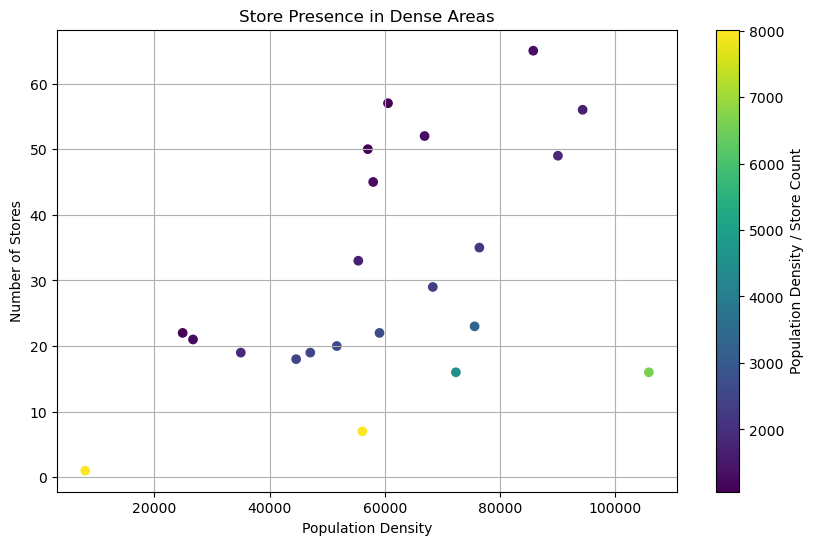

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


# Group merged_df1 by 'Zip' and aggregate population density and number of stores
zip_data = merged_df1.groupby('Zip').agg({'pop_den': 'first', 'Store Name': 'count'})

# Calculate the ratio of population density to store count
zip_data['ratio'] = zip_data['pop_den'] / zip_data['Store Name']

# Normalize the ratio values
norm = Normalize(vmin=zip_data['ratio'].min(), vmax=zip_data['ratio'].max())

# Create a colormap
cmap = plt.get_cmap('viridis')

# Plot pop_den vs. Store Name with color gradient based on ratio
plt.figure(figsize=(10, 6))
plt.scatter(zip_data['pop_den'], zip_data['Store Name'], c=zip_data['ratio'], cmap=cmap, norm=norm)
plt.xlabel('Population Density')
plt.ylabel('Number of Stores')
plt.title('Store Presence in Dense Areas')
plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), label='Population Density / Store Count')
plt.grid(True)
plt.show()


In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by zip code and calculate total population density and store count
zip_data = merged_df1.groupby('Zip').agg({'pop_den': 'first', 'Store Name': 'count'})

# Step 2: Calculate population density per store count
zip_data['pop_den_per_store'] = zip_data['pop_den'] / zip_data['Store Name']


zip_data

,pop_den,Store Name,pop_den_per_store
Zip,,,
10027,72357.3,16,4522.331250
10029,94363.1,56,1685.055357
10030,105863.1,16,6616.443750
10035,24895.7,22,1131.622727
10037,68340.7,29,2356.575862
10451,47063.6,19,2477.031579
10452,76427.7,35,2183.648571
10453,85787.3,65,1319.804615
10455,56097.4,7,8013.914286


In [149]:
# Group merged_df1 by 'Zip' and aggregate population density and number of stores
zip_data = merged_df1.groupby('Zip').agg({'pop_den': 'first', 'Store Name': 'count'})

# Merge zip_data with merged_df1 to include the 'Borough' column
zip_data = zip_data.merge(merged_df1[['Zip', 'Borough']], on='Zip', how='left')

# Calculate population density per store
zip_data['pop_den_per_store'] = zip_data['pop_den'] / zip_data['Store Name']

# Group zip_data by 'Borough' and aggregate the population density, store count, and population density per store
borough_data = zip_data.groupby('Borough').agg({'pop_den': 'sum', 'Store Name': 'sum', 'pop_den_per_store': 'mean'})

# Calculate the population density to store count ratio
borough_data['pop_den_store_count_ratio'] = borough_data['pop_den'] / borough_data['Store Name']

print(borough_data)


              pop_den  Store Name  pop_den_per_store  \
Borough                                                
Bronx      21280630.0       12303        2094.919931   
Brooklyn   13001170.1       10065        1405.542041   
Manhattan  10665445.7        4973        2631.797842   

           pop_den_store_count_ratio  
Borough                               
Bronx                    1729.710640  
Brooklyn                 1291.720825  
Manhattan                2144.670360  


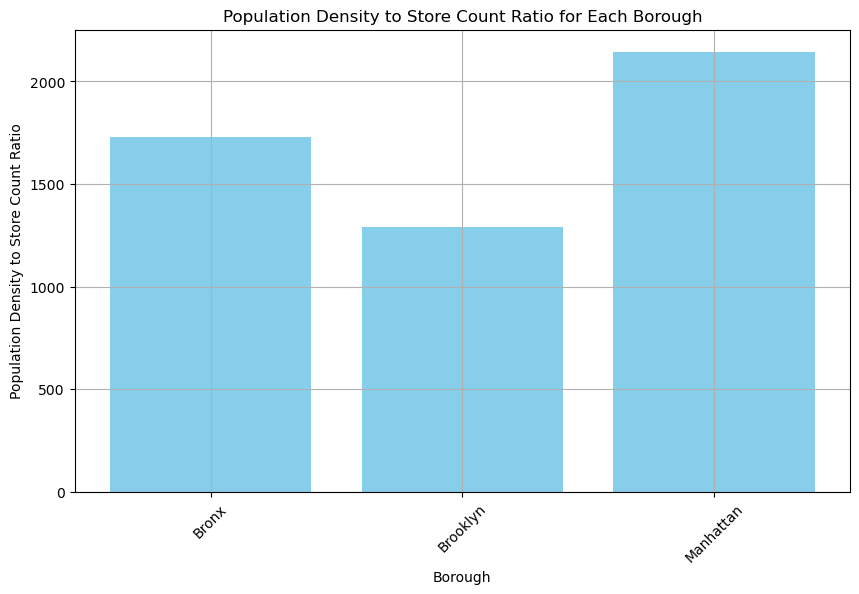

In [152]:
import matplotlib.pyplot as plt

# Scatter plot for population density to store count ratio for each borough
plt.figure(figsize=(10, 6))
plt.bar(borough_data.index, borough_data['pop_den_store_count_ratio'], color='skyblue')
plt.title('Population Density to Store Count Ratio for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Population Density to Store Count Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Report:

Questions Considered regarding healthy options

1. How many stores received recognition from the Borough President's Office each year, and what is the trend over time? 
2. How does this trend look borough-wise?
3. What is the distribution of recognized stores across different boroughs of New York City?
4. Are there any patterns or trends in the types of neighborhoods or community board areas where recognized stores are located?¶
5. Is there a relationship between population density and the number of recognized stores in a neighborhood?


Answers found:

1. The trend gradually started and reached its peak in 2017 with 119 stores being recognized officially by the chancellor's office. It took a dip and then came back to around 116 in 2020. Although data from an entire year of 2021 is missing, we can see an increasing trend in 2022 with 92 stores being recognized officially. The year with the lowest number if stores recognized was 2014 with only 27 stores. 

2. Despite having highs and lows, the overall recognized store number per year for Bronx is increasing. On the otherhand, it has been decreasing for Manhattan. Brooklyn on the other hand has a balanced trend, plummeting in 2021 due to lack of data and is has shot up in 2023's numbers.  

3. Bronx has traditionally been a dominator in recognized store rates with 43.1% of recognized stores being from bronx in the last 10 years. Manhattan and Brooklyn collectively add up to 56.9%.

4. Despite not being the borough with the highest recognitins in the past 10 years, most of the recognized stores today belong to Manhattan neighborhoods. 

    - MN1102 (Neighborhood Tabulation Area in Manhattan) has the highest number of recognized stores with 47 stores, followed by MN1002 (also in Manhattan) with 43 stores.

    - Several other neighborhoods in Brooklyn (BK0302, BK1602, BK0401) and the Bronx (BX0502, BX0403, BX0401, BX0501) are also among the top 10 neighborhoods with a high number of recognized stores.

    - Interms of boards, Community Board 205.0 has the highest number of recognized stores with 84 stores, followed by Community Board 111.0 with 80 stores. These high counts indicate areas with potentially better access to healthy food options and active efforts towards promoting healthier eating habits.

    - Several census tracts have only one recognized store, indicating potential areas with limited access to healthy food options. These areas might require more attention and intervention to address nutritional disparities and improve access to healthier food choices.

    - Some census tracts have a relatively high number of recognized stores, indicating areas where efforts to promote healthier food options have been successful. Understanding the factors contributing to the success of these areas can provide valuable insights for implementing similar initiatives in other regions.

5. The analysis reveals intriguing insights into the relationship between population density and the presence of stores across the boroughs of New York City. Bronx emerges as the borough with the highest population density, with a population density of approximately 21.3 million per square mile. Remarkably, despite its dense population, it also boasts the highest number of stores among the boroughs, with 12,303 recognized establishments. This translates to a population density to store count ratio of approximately 1729.7, indicating a high concentration of stores relative to its population density. Conversely, Manhattan, known for its bustling commercial districts, exhibits a slightly lower population density compared to the Bronx, at around 10.7 million per square mile. However, it maintains a remarkably high ratio of population density to store count, surpassing even the Bronx, with a ratio of approximately 2144.7. Brooklyn, with a population density of approximately 13 million per square mile, falls between the Bronx and Manhattan in terms of both population density and store count. Its population density to store count ratio, at around 1291.7, suggests a slightly lower concentration of stores relative to its population density compared to the other two boroughs. e can say that denser areas tend to have a higher presence of stores, potentially driven by the demands and preferences of the local population as well as economic and commercial factors unique to each borough.

### Questions to explore:

- Is there a correlation between demographic factors (e.g., population density, age distribution) and the presence of recognized stores in a neighborhood?

- Can we identify any demographic predictors of the number of recognized stores in a neighborhood?